# Clase 14: continuación con los datos
En esta clase vamos a continuar con el uso de `pandas`. Veremos: 
1. Consultas SQL
    - Qué es? 
    - Select
    - Where
    - Join
    - Union
    - Update
    - Delete
2. Ejercicios

## 1. Repaso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Para el ejemplo de esta clase vamos a usar una pequeña base llamada `tips` que tiene a disposición la librería `pandas`.

In [2]:
#Podemos llamar la librería con el siguiente url
url = ("https://raw.github.com/pandas-dev"
        "/pandas/master/pandas/tests/io/data/csv/tips.csv")


#Creamos el DataFrame
tips = pd.read_csv(url)
#Revisamos el contenido
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Vamos a crear una función que nos permita visualizar información del DataFrame

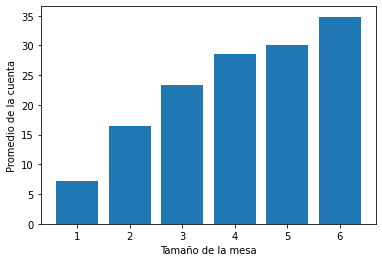

In [3]:
#Declaramos la función y el nombre del input
def grafico1(DF): 
    #Definimos los datos a usar
    data1 = DF[['total_bill', 'size']].groupby('size').mean()
    plt.bar(data1.index, data1.total_bill)
    plt.xlabel("Tamaño de la mesa")
    plt.ylabel("Promedio de la cuenta")    

#Llamamos la función y le damos el input
grafico1(tips)    

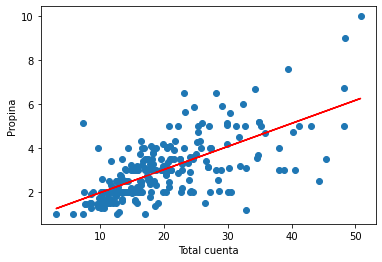

In [4]:
#Declaramos la función y el nombre del input
def grafico2(DF): 
    #Definimos los datos
    x = DF.total_bill
    y = DF.tip
    #Gráfico de puntos (scatter)
    plt.scatter(x, y)
    plt.xlabel("Total cuenta")
    plt.ylabel("Propina")    
    
    #Gráfico de línea
    m, b = np.polyfit(x, y, 1)    #Sacar la pendiente y el intercepto de y(x)
    plt.plot(x, m*x + b, color='r')

#Llamamos la función y le damos el input
grafico2(tips) 

Y si la función la queremos con dos input? 

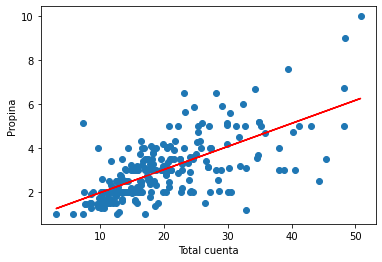

In [5]:
#Declaramos la función y el nombre del input
def grafico2(x, y): 
    #Gráfico de puntos (scatter)
    plt.scatter(x, y)
    plt.xlabel("Total cuenta")
    plt.ylabel("Propina")    
    
    #Gráfico de línea
    m, b = np.polyfit(x, y, 1)    #Sacar la pendiente y el intercepto de y(x)
    plt.plot(x, m*x + b, color='r')

#Creamos las variables que vamos a usar como input
x = tips.total_bill 
y = tips.tip
#Hacemos el gráfico
grafico2(x, y) 

Si queremos guardar la diferencia entre las filas de una variable del set de datos, podemos por ejemplo usar un `for`

In [6]:
#Definimos la variable a utilizar
var = tips.total_bill
#Creamos la lista donde vamos a guardar los datos
lista = []
#Realizamos el lopp: desde el segundo valor hasta el último (1, n)
for i in range(1, len(var)): 
    lista.append(var[i]-var[i-1]) #Sacamos la diferencia

print(var[0:10])
print(lista[0:10])

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
5    25.29
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: float64
[-6.649999999999999, 10.670000000000002, 2.669999999999998, 0.9100000000000001, 0.6999999999999993, -16.52, 18.11, -11.84, -0.2599999999999998, -4.51]


Otra forma es usar la función `diff`. El siguiente link muestra en detalle cómo usar la función: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

In [7]:
#si queremos sacar la diferencia de una variable definimos el DataFrame.nombre_variable.diff()
print(tips.total_bill.diff().head())

#Tambien podemos especificar los periodos para hacer la diferencia
print(tips.total_bill.diff(periods=3).head())

#Podemos cambiar el sentido de la diferencia (ascendente o descendente)
print(tips.total_bill.diff(periods=-3).head())

0      NaN
1    -6.65
2    10.67
3     2.67
4     0.91
Name: total_bill, dtype: float64
0      NaN
1      NaN
2      NaN
3     6.69
4    14.25
Name: total_bill, dtype: float64
0    -6.69
1   -14.25
2    -4.28
3    14.91
4    -2.29
Name: total_bill, dtype: float64


## 2. Consultas SQL
SQL (por su nombre en inglés) es un lenguaje de programación utilizado para trabajar con `bases relacionales`. Este lenguaje nos permite recuperar de forma simple información de bases de datos donde tenemos bases que pueden estar relacionadas mediante alguna variable. Por ejemplo: 


```{figure} base_relacional.png
---
height: 400px
name: relacional-fig
---
% Ejemplo base relacional.
```

Podemos tener información de diferentes fuentes, planillas de costos, ingresos, compras, etc. y buscar vincular esta información para hacer análisis, presentar información o realizar cálculos específico. 

El objetivo de esta clase no es SQL, sino la forma de trabajar este lenguaje. En python podemos usar `pandas` para replicar el trabajo con bases de datos relacionales. 

### Select
El objetivo es seleccionar un set de información específico

In [8]:
#Ponemos el DataFrame y las variables específicas que queremos
#Ojo que va "DataFrame[]" y dentro del paréntesis van las variables dentro de un "[]"
tips[["total_bill", "tip", "smoker", "time"]].head(5)

,total_bill,tip,smoker,time
0,16.99,1.01,No,Dinner
1,10.34,1.66,No,Dinner
2,21.01,3.50,No,Dinner
3,23.68,3.31,No,Dinner
4,24.59,3.61,No,Dinner


Para agregar un nueva variable según un ratio podemos usar `DataFrame.assign()`

In [9]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"]).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### Where
Usamos este tipo de consulta para seleccionar una información en específico, por ejemplo cuando la variable `time` es igual a `Diner`

In [10]:
#La sintaxis es DataFrame[DataFrame[Variable] == Condicion]
#En resumen le estamos diciendo DataFrame[Variable == Condicion], donde Variable=DataFrame[Variable]
tips[tips["time"] == "Dinner"].head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Podemos ver si se cumple una condición como verdadero/falso y podemos usar la función `value_counts()` para ver cuántas veces se cumple o no

In [11]:
#Creamos una variable que guarde si se cumple la condición
variable_condicion = tips["time"] == "Dinner"

#Evaluamos cuantas veces se cumple la condición con la función value_counts()
variable_condicion.value_counts()

True     176
False     68
Name: time, dtype: int64

Luego, podemos revisar el DataFrame donde se cumpla la condición que establecimos previamente.

In [12]:
tips[variable_condicion].head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Podemos seleccionar más de una condición usando `&` (and) or `|` (or)

Por ejemplo, seleccionamos cuando time=Dinner y cuando tip>5. 

In [13]:
#LLamamos el DataFrame[variable1 == condicion1 & variable2 >condicion2]
tips[(tips["time"] == "Dinner") & (tips["tip"] > 5.00)]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
116,29.93,5.07,Male,No,Sun,Dinner,4
155,29.85,5.14,Female,No,Sun,Dinner,5
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2


In [14]:
#La condición "o" la llamamos con el símbolo "|"" 
tips[(tips["size"] >= 5) | (tips["total_bill"] > 45)]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
125,29.80,4.20,Female,No,Thur,Lunch,6
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
185,20.69,5.00,Male,No,Sun,Dinner,5


Muchas veces los datos vienen con información vacía o nula. En `pandas` existe el tipo `NaN` que significa `Not a Number` (valores faltantes). Para seleccionar este tipo de datos (o excluirlos) podemos usar `isna()` (o `notna()`). 

Para ejemplificar lo anterio vamos a crear un pequeño dataframe con este tipo de datos con `np.NaN`. 

In [15]:
ej_null = pd.DataFrame({"col1": ["A", "B", np.NaN, "C", "D"], "col2": ["F", np.NaN, "G", "H", "I"]})
ej_null.head()

,col1,col2
0,A,F
1,B,NaN
2,NaN,G
3,C,H
4,D,I


Seleccionamos el dataframe cuando la columna 2 tiene valores del tipo NaN

In [16]:
ej_null[ej_null["col2"].isna()]

,col1,col2
1,B,NaN


O cuando la columna 1 no tiene valores del tipo NaN

In [17]:
ej_null[ej_null["col1"].notna()]

,col1,col2
0,A,F
1,B,NaN
3,C,H
4,D,I


### Group by

Las clases anteriores vimos algunos ejemplos de como usar la función groupby(). Por ejemplo, si queremos agrupar por sexo y saber el número de tips podemos hacer lo siguiente

In [18]:
#Si agrupamos por sexo y nos cuenta todo el set de datos tendremos información irrelevante de sobra
print(tips.groupby("sex").count())
#Podemos seleccionar la información específica que queremos
print(tips[['tip', 'sex']].groupby("sex").count())

        total_bill  tip  smoker  day  time  size
sex                                             
Female          87   87      87   87    87    87
Male           157  157     157  157   157   157
        tip
sex        
Female   87
Male    157


In [19]:
#O una forma más simple
print(tips.groupby("sex").size())

sex
Female     87
Male      157
dtype: int64


Una diferencia importante entre estos dos métodos (count() vs size()) es que el count() se aplica sobre todas las variables y no incluye los `not null`, mientras que size() da el total. Si usamos el dataframe del ejemplo anterior: 

In [20]:
print(ej_null.groupby('col1').size())
print(ej_null.groupby('col1').count())

col1
A    1
B    1
C    1
D    1
dtype: int64
      col2
col1      
A        1
B        0
C        1
D        1


Podemos hacer multiples operaciones usando la función `agg()`. Por ejemplo podemos agrupar por día, y que realice el promedio 'tip', junto con la cantidad de días. 

La sintaxis es DataFrame.groupby("Variable a agrupar).agg({"variable1":operacion, "variable2":operacion})

In [21]:
tips.groupby("day").agg({"tip": np.mean, "day": np.size})

,tip,day
day,,
Fri,2.734737,19
Sat,2.993103,87
Sun,3.255132,76
Thur,2.771452,62


Para agrupar por mas de una variable usamos una lista dentro del `groupby` y luego la operación que queremos con `agg()`. 

In [22]:
tips.groupby(["smoker", "day"]).agg({"tip": [np.size, np.mean]})

tip          
             size      mean
smoker day                 
No     Fri    4.0  2.812500
       Sat   45.0  3.102889
       Sun   57.0  3.167895
       Thur  45.0  2.673778
Yes    Fri   15.0  2.714000
       Sat   42.0  2.875476
       Sun   19.0  3.516842
       Thur  17.0  3.030000

### Join
Una función del tipo `join` se utiliza para juntar bases de datos mediante alguna variable en común. 

Los tipos de join más usados son: 

```{figure} join_sql.png
---
height: 400px
name: join_sql-fig
---
% Ejemplos de Join.
```

Para nuestro ejemplo vamos a crear dos DataFrame que van a compartir informacion y que vamos a ir vinculando según los diferentes tipos de join. 

In [23]:
df1 = pd.DataFrame({"key": ["A", "B", "C", "D"], "value": np.random.randn(4)})
df2 = pd.DataFrame({"key": ["B", "D", "D", "E"], "value": np.random.randn(4)})
print(df1.head())
print(df2.head())

  key     value
0   A  1.406547
1   B  0.033805
2   C -0.471596
3   D -0.519430
  key     value
0   B -0.174213
1   D -0.446153
2   D  0.647740
3   E  2.410276


#### Inner Join
Juntamos dos Bases usando la llave en ambas tablas. 
En nuestro ejemplo la llave (key) que se encuentra en ambas tablas corresponden a: B y D. Entonces vamos a excluir A, C y E. 

Sin embargo, en la tabla 2 la llave D está dos veces, por lo que nuestra tabla final va a incluir este resultado la cantidad de veces que se encuentre en la tabla 1 y tabla 2. 

In [24]:
pd.merge(df1, df2, on="key")

,key,value_x,value_y
0,B,0.033805,-0.174213
1,D,-0.519430,-0.446153
2,D,-0.519430,0.647740


#### Left outher join
Este tipo de consulta se usa cuando queremos mostrar toda la información de una tabla y sólo la información de la segunda tabla cuando se condicen las llaves


In [25]:
pd.merge(df1, df2, on="key", how="left")

,key,value_x,value_y
0,A,1.406547,NaN
1,B,0.033805,-0.174213
2,C,-0.471596,NaN
3,D,-0.519430,-0.446153
4,D,-0.519430,0.647740


#### Right Join
Nos muestra todo lo de la tabla de la derecha y sólo los valores de la izquierda cuando coincide la llave. 


In [26]:
pd.merge(df1, df2, on="key", how="right")

,key,value_x,value_y
0,B,0.033805,-0.174213
1,D,-0.519430,-0.446153
2,D,-0.519430,0.647740
3,E,NaN,2.410276


#### Full Join
Cuando queremos mostrar todos los datos de ambos dataframe

In [27]:
pd.merge(df1, df2, on="key", how="outer")

,key,value_x,value_y
0,A,1.406547,NaN
1,B,0.033805,-0.174213
2,C,-0.471596,NaN
3,D,-0.519430,-0.446153
4,D,-0.519430,0.647740
5,E,NaN,2.410276


### Union
Usamos esta consulta cuando queremos agregar dos tablas o bases de datos. 

Por ejemplo, si creamos dos DataFrames con ciudad y ranking en calidad de vida

In [28]:
df1 = pd.DataFrame({"ciudad": ["Valdivia", "Santiago", "Valparaiso"], "rank": range(1, 4)})
df2 = pd.DataFrame({"ciudad": ["Iquique", "Puerto Montt", "Valdivia"], "rank": [5, 4, 1]})
print(df1)
print(df2)

       ciudad  rank
0    Valdivia     1
1    Santiago     2
2  Valparaiso     3
         ciudad  rank
0       Iquique     5
1  Puerto Montt     4
2      Valdivia     1


Los podemos unir usando la función `concat`

In [29]:
pd.concat([df1, df2])

,ciudad,rank
0,Valdivia,1
1,Santiago,2
2,Valparaiso,3
0,Iquique,5
1,Puerto Montt,4
2,Valdivia,1


Para eliminar los duplicados podemos usar `drop_duplicates`

In [30]:
df3 = pd.concat([df1, df2]).drop_duplicates()
print(df3)

         ciudad  rank
0      Valdivia     1
1      Santiago     2
2    Valparaiso     3
0       Iquique     5
1  Puerto Montt     4


### Update
Cuando queremos actualizar una variable debemos definir una condición y un nuevo valor. Esto lo podemos hacer para variables numéricas o variables de texto. Para esto usamos la función `loc`

In [31]:
df3.loc[df3["ciudad"] == "Puerto Montt", "ciudad"] = "Pto. Montt"
print(df3)

       ciudad  rank
0    Valdivia     1
1    Santiago     2
2  Valparaiso     3
0     Iquique     5
1  Pto. Montt     4


### Delete
Para eliminar un valor también vamos a usar la función `loc`. Vamos a definir una condición que no se cumple (`!=`) y con ella excluir un valor en particular. Por ejemplo, podemos sacar de la tabla cuando la ciudad es Iquique.  

In [32]:
df3 = df3.loc[df3["ciudad"] != "Iquique"] 
print(df3)

       ciudad  rank
0    Valdivia     1
1    Santiago     2
2  Valparaiso     3
1  Pto. Montt     4


## 3. Ejercicios

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
nombre = pd.read_excel("ejemplo_sql.xlsx", sheet_name='nombre', thousands=",")
edad = pd.read_excel("ejemplo_sql.xlsx", sheet_name='edad', thousands=",")
almuerzo = pd.read_excel("ejemplo_sql.xlsx", sheet_name='Almuerzo', thousands=",")

In [35]:
print(nombre.head())
print(edad.head())
print(almuerzo.head())

      Nombre  id
0       Juan   1
1     Andrea   2
2      Ramón   3
3  Valentina   4
   id  Edad
0   1    10
1   2    25
2   3    60
3   4    55
   id     dia  hora         almuerzo
0   1   Lunes    12  pastel de papas
1   2   Lunes    13          porotos
2   3   Lunes    14         lentejas
3   4   Lunes    12          pescado
4   1  Martes    14         ensalada


1. Seleccionar del dataframe nombre cuando es igual a Valentina. Guardar el id en una variable `id_valentina`. 


In [36]:
id = nombre[nombre["Nombre"] == "Valentina"].id

2. Usando el dataframe de almuerzo agrupar por día=lunes y ver hora promedio de almuerzo. 


In [37]:
df_lunes = almuerzo[almuerzo["dia"] == "Lunes"]
df_lunes[["dia", "hora"]].groupby("dia").mean()

,hora
dia,
Lunes,12.75


3. Graficar el promedio de hora de almuerzo por día. Usar un gráfico de barras. 


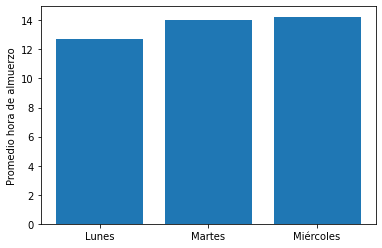

In [38]:
x = almuerzo[["dia", "hora"]].groupby("dia").mean().index
y = almuerzo[["dia", "hora"]].groupby("dia").mean()
plt.bar(x, y.hora)
plt.ylabel("Promedio hora de almuerzo")
plt.show()

4. Usando las funciones del tipo join ver: 
    - ¿Qué almorzó Juan en la semana? 
    - ¿A qué hora y qué almorzó Andrea el martes? 
    - Crear dataframe `df_total` con las variables id, Nombre, Edad, dia, hora y almuerzo. 


In [39]:
#Inner join: Almuerzo de juan
df = pd.merge(nombre, almuerzo, on="id", how="outer")
df_juan = df[["Nombre", "almuerzo"]][df.Nombre == "Juan"]
print(df_juan)


#Andrea
df_andrea = df[["Nombre", "almuerzo"]][(df.Nombre == "Andrea") & (df.dia=="Martes")]
print(df_andrea)
      
#Data Frame total
df_total = pd.merge(nombre, edad, on="id", how="outer")
df_total = pd.merge(df_total, almuerzo, on="id",how="outer") 
print(df_total)

  Nombre         almuerzo
0   Juan  pastel de papas
1   Juan         ensalada
2   Juan        garbanzos
   Nombre almuerzo
4  Andrea      NaN
       Nombre  id  Edad        dia  hora         almuerzo
0        Juan   1    10      Lunes    12  pastel de papas
1        Juan   1    10     Martes    14         ensalada
2        Juan   1    10  Miércoles    16        garbanzos
3      Andrea   2    25      Lunes    13          porotos
4      Andrea   2    25     Martes    14              NaN
5      Andrea   2    25  Miércoles    13          cazuela
6       Ramón   3    60      Lunes    14         lentejas
7       Ramón   3    60     Martes    13            asado
8       Ramón   3    60  Miércoles    14              NaN
9   Valentina   4    55      Lunes    12          pescado
10  Valentina   4    55     Martes    15              NaN
11  Valentina   4    55  Miércoles    14              NaN


5. ¿Cuántas observaciones tiene el `df_total`? 

In [40]:
df_total.id.count()

12

6. ¿Qué variables tienen NaN y cuántos NaN hay? 


In [41]:
#Variables que tienen NaN
#Definimos una variable que evalúe si una variable tiene NaN -> print esta variable tiene NaN
def NA(df): 
    if df.Nombre.isna().any() == True: #Ocupamos la función any() para comparar cada valor de la variable igual a la condición
        print("Nombre tiene NaN")
    elif df.id.isna().any() == True: 
        print("id tiene NaN")
    elif df.Edad.isna().any() == True: 
        print("Edad tiene NaN")        
    elif df.id.isna().any() == True: 
        print("id tiene NaN")
    elif df.dia.isna().any() == True: 
        print("dia tiene NaN")        
    elif df.hora.isna().any() == True: 
        print("hora tiene NaN")           
    elif df.almuerzo.isna().any() == True: 
        print("almuerzo tiene NaN")   
        
#Evaluamos la función        
NA(df_total)

#Cuántos NaN? 
#Sabemos que sólo almuerzo tiene NaN
print("La variable almuerzo tiene " + str(df_total[df_total["almuerzo"].isna()].id.count()) + " NaN." )

almuerzo tiene NaN
La variable almuerzo tiene 4 NaN.


7. Crear un nuevo dataframe excluyendo los NaN

In [42]:
condicion = df_total.almuerzo.notna() == True
df_sinNaN = df_total[condicion]
print(df_sinNaN)

      Nombre  id  Edad        dia  hora         almuerzo
0       Juan   1    10      Lunes    12  pastel de papas
1       Juan   1    10     Martes    14         ensalada
2       Juan   1    10  Miércoles    16        garbanzos
3     Andrea   2    25      Lunes    13          porotos
5     Andrea   2    25  Miércoles    13          cazuela
6      Ramón   3    60      Lunes    14         lentejas
7      Ramón   3    60     Martes    13            asado
9  Valentina   4    55      Lunes    12          pescado
